# Sample code for merging data by DOF

In [52]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import pandas_profiling

In [53]:
df = pd.read_csv("sample_data_short_CLEAN.csv", sep=",")
df.shape

(1349779, 33)

In [54]:
print("HI")

HI


In [55]:
amount_dof = df["numero_serie_dof"].nunique()
print("Amount of unique DOFs", amount_dof)

Amount of unique DOFs 475764


In [56]:
df = df.groupby(['nome_remetente', 'cpf_remetente', 'uf_origem',
       'municipio_origem', 'cd_mun_origem', 'latitude_origem',
       'longitude_origem', 'ctf_remetente', 'uf_destino', 'municipio_destino',
       'cd_mun_destino', 'latitude_destino', 'longitude_destino',
       'nome_destinatario', 'cpf_destinatario', 
       'dt_emissao', 'ano', 'dt_validade_inicial', 'dt_validade_final',
       'ultima_transacao', 'dt_ultima_transacao', 'numero_serie_dof',
       'codigo_controle_dof', 'rota_transporte'], as_index=False)[["volume", "valor"]].sum()

# Uncomment below to save the data

In [57]:
#df.to_csv("sample_data_short_CLEAN_DOF_GROUPBY.csv", index=False)

In [59]:
df.nunique()

nome_remetente           1475
cpf_remetente            1287
uf_origem                   2
municipio_origem           69
cd_mun_origem              69
latitude_origem            69
longitude_origem           69
ctf_remetente            1332
uf_destino                 26
municipio_destino        2182
cd_mun_destino           2219
latitude_destino         2219
longitude_destino        2219
nome_destinatario       31336
cpf_destinatario        14396
dt_emissao                982
ano                         3
dt_validade_inicial       989
dt_validade_final         998
ultima_transacao            9
dt_ultima_transacao       983
numero_serie_dof       475764
codigo_controle_dof    475764
rota_transporte         13850
volume                 169391
valor                  258327
dtype: int64

In [60]:
amount_dof = df["numero_serie_dof"].nunique()
print("Amount of unique DOFs", amount_dof)

Amount of unique DOFs 475764


In [61]:
amount_outside = df[~df["uf_destino"].isin(["RO", "AC"])]["numero_serie_dof"].nunique()

In [62]:
amount_outside / amount_dof

0.23458269225918732

In [63]:
df.groupby("cpf_remetente").count()

,nome_remetente,uf_origem,municipio_origem,cd_mun_origem,latitude_origem,longitude_origem,ctf_remetente,uf_destino,municipio_destino,cd_mun_destino,latitude_destino,longitude_destino,nome_destinatario,cpf_destinatario,dt_emissao,ano,dt_validade_inicial,dt_validade_final,ultima_transacao,dt_ultima_transacao,numero_serie_dof,codigo_controle_dof,rota_transporte,volume,valor
cpf_remetente,,,,,,,,,,,,,,,,,,,,,,,,,
002********,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344
00393247000115,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
00525034000108,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364
00534961000186,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
00587611000188,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
006********,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278
00611256000135,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690,690
00614413000166,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
00641390000189,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223


In [65]:
temp = pd.DataFrame()
cnpj_qtd = (~df["cpf_remetente"].str.contains("\*")).sum() 
person_qtd = df["cpf_remetente"].str.contains("\*").sum()

In [66]:
cnpj_qtd, person_qtd

(422012, 53752)

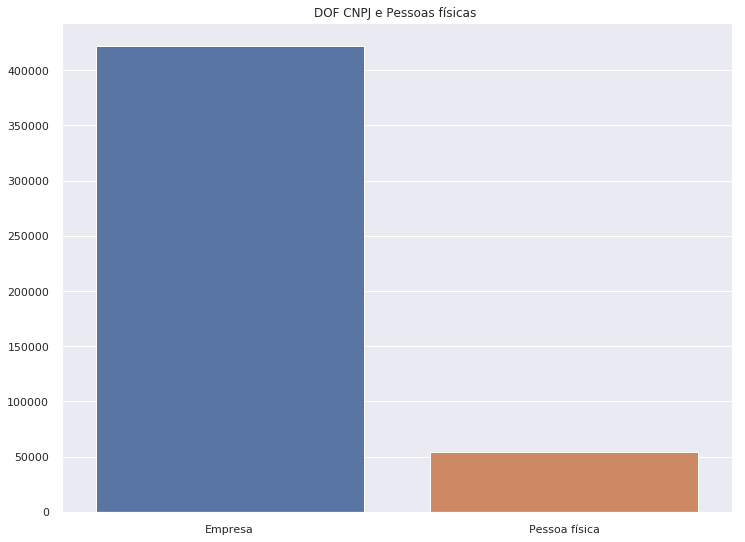

In [68]:
plt.figure(figsize=(12, 9))
sns.barplot(y=[cnpj_qtd, person_qtd], x=["Empresa", "Pessoa física"])
plt.title("DOF CNPJ e Pessoas físicas");